In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import copy

In [5]:
(train, y_train),(test, y_test) = mnist.load_data() # importing MNIST data
index_train=np.arange(2000)
index_test=np.arange(1000)
np.random.shuffle(index_train)
np.random.shuffle(index_test)

x_train = train[index_train].reshape(2000, 28 * 28)
x_test = test[index_test].reshape(1000, 28 * 28)

y_train = y_train[index_train]
y_test = y_test[index_test]

In [20]:
SOM_Shape = np.array([25, 25])
w = np.random.uniform(0, 1, ( x_train.shape[1],SOM_Shape[0]*SOM_Shape[1]))

R = 0 # Radius
a = 0.001 # Learning Rate
t_maxiter = 10 
t = 1
Classes = np.zeros((1, SOM_Shape[0]*SOM_Shape[1]))


In [15]:
def Nearfinder(Rad,indx):
    mod = indx % 25

    div = indx // 25
    
    R, C = div + (mod > 0), 25 if mod == 0 else mod
    Near = []
    for i in range(R - Rad, R + Rad + 1):
        for j in range(C - Rad, C + Rad + 1):
            if (1 <= i <= 25) and (1 <= j <= 25):
                Near.append(25 * (i - 1) + j - 1)
    return Near

In [21]:
for t in range(1,t_maxiter+1):
    for Train in x_train:
        D = np.array([(w[:,j]-Train).dot((w[:,j]-Train).T) for j in range(SOM_Shape[0]*SOM_Shape[1])])
        J = np.argmin(D)
        Nears = Nearfinder(R,J + 1)
        for N in Nears:
            w[:, N] = w[:, N] + (Train - w[:, N])*a
    a = a / 10.
    if t % t_maxiter == 0:
        R = 0

In [22]:
for Train in x_test:
    D = np.array([(w[:,j]-Train).dot((w[:,j]-Train).T) for j in range(SOM_Shape[0]*SOM_Shape[1])])
    J = np.argmin(D)
    Classes[0, J] += 1

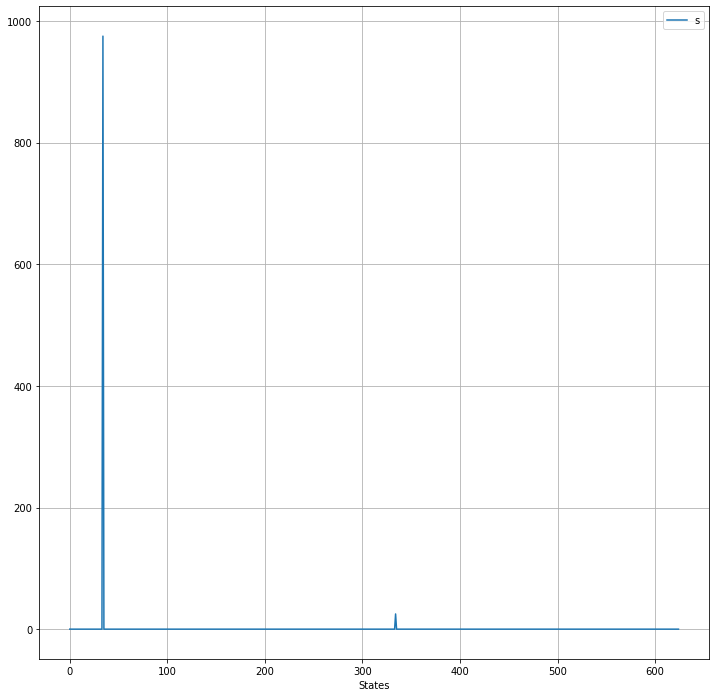

number of Classes identified as winner : 2


In [24]:
plt.figure(figsize=(12,12))

plt.plot(Classes[0,:])
plt.xlabel('States')
plt.legend('show')
plt.grid()
plt.show()

print('number of Classes identified as winner : '+str(np.count_nonzero(Classes[0,:])))

In [25]:
SOM_Shape = np.array([25, 25])
w_2 = np.random.uniform(0, 1, ( x_train.shape[1],SOM_Shape[0]*SOM_Shape[1]))

R = 2 # Radius
a = 0.001 # Learning Rate
t_maxiter = 10 
t = 1
Classes_2 = np.zeros((1, SOM_Shape[0]*SOM_Shape[1]))

In [27]:
for t in range(1,t_maxiter+1):
    for Train in x_train:
        D = np.array([(w_2[:,j]-Train).dot((w_2[:,j]-Train).T) for j in range(SOM_Shape[0]*SOM_Shape[1])])
        J = np.argmin(D)
        Nears = Nearfinder(R,J + 1)
        for N in Nears:
            w_2[:, N] = w_2[:, N] + (Train - w_2[:, N])*a
    a = a / 10.
    if t % t_maxiter == 0:
        R = 0

In [28]:
for Train in x_test:
    D = np.array([(w_2[:,j]-Train).dot((w_2[:,j]-Train).T) for j in range(SOM_Shape[0]*SOM_Shape[1])])
    J = np.argmin(D)
    Classes_2[0, J] += 1

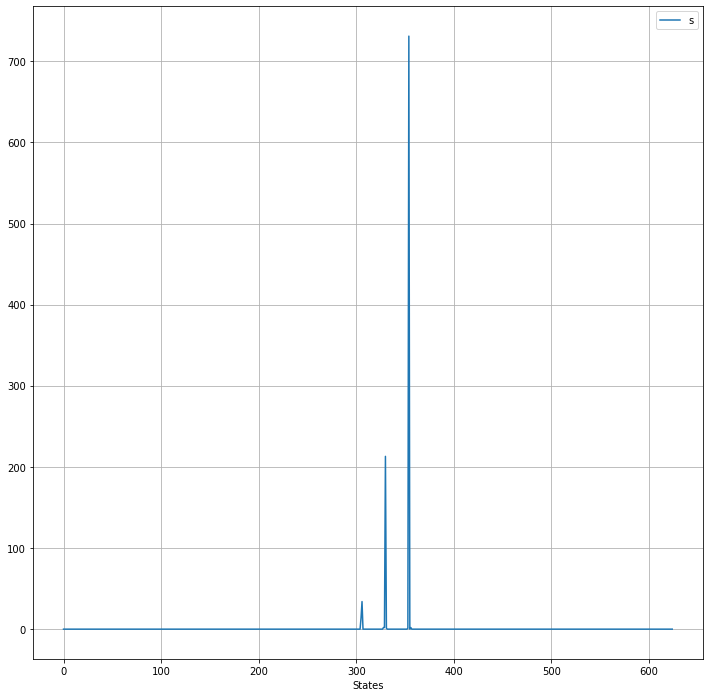

number of Classes identified as winner : 9


In [29]:
plt.figure(figsize=(12,12))

plt.plot(Classes_2[0,:])
plt.xlabel('States')
plt.legend('show')
plt.grid()
plt.show()

print('number of Classes identified as winner : '+str(np.count_nonzero(Classes_2[0,:])))

In [30]:
SOM_Shape = np.array([25, 25])
w_3 = np.random.uniform(0, 1, ( x_train.shape[1],SOM_Shape[0]*SOM_Shape[1]))

R = 1 # Radius
a = 0.01 # Learning Rate
t_maxiter = 6 
t = 1
Classes_3 = np.zeros((1, SOM_Shape[0]*SOM_Shape[1]))

In [31]:
for t in range(1,t_maxiter+1):
    for Train in x_train:
        D = np.array([(w_3[:,j]-Train).dot((w_3[:,j]-Train).T) for j in range(SOM_Shape[0]*SOM_Shape[1])])
        J = np.argmin(D)
        Nears = Nearfinder(R,J + 1)
        for N in Nears:
            w_3[:, N] = w_3[:, N] + (Train - w_3[:, N])*a
    a = a / 10.
    if t % t_maxiter == 0:
        R = 0

In [32]:
for Train in x_test:
    D = np.array([(w_3[:,j]-Train).dot((w_3[:,j]-Train).T) for j in range(SOM_Shape[0]*SOM_Shape[1])])
    J = np.argmin(D)
    Classes_3[0, J] += 1

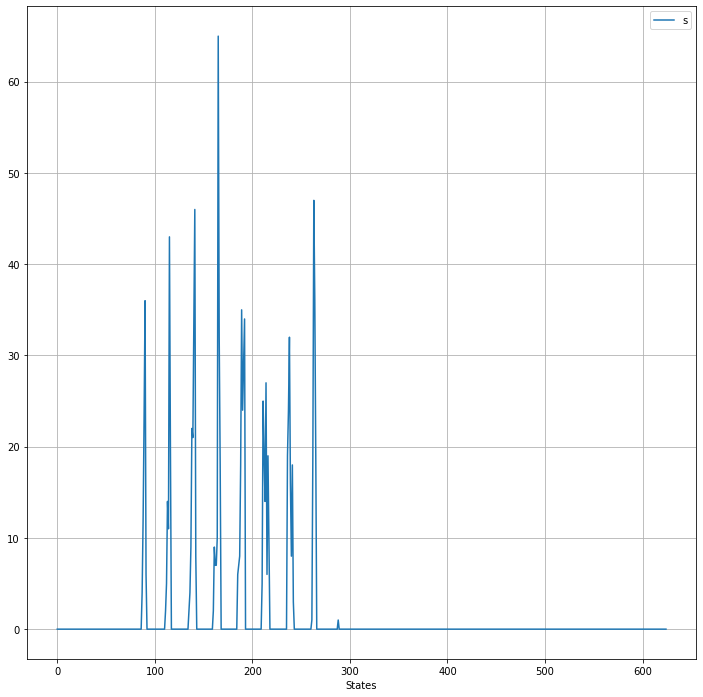

number of Classes identified as winner : 56


In [33]:
plt.figure(figsize=(12,12))

plt.plot(Classes_3[0,:])
plt.xlabel('States')
plt.legend('show')
plt.grid()
plt.show()

print('number of Classes identified as winner : '+str(np.count_nonzero(Classes_3[0,:])))

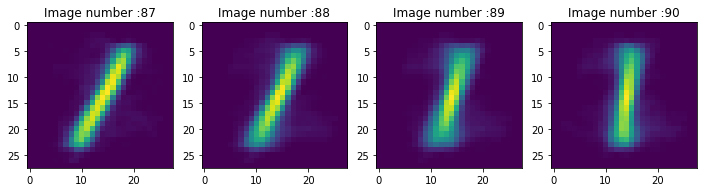

In [37]:
index_to_show = np.nonzero(Classes_3[0])[0]
fig, axs = plt.subplots(1, 4, figsize=(12,12))
for i in range(4):
    axs[i].imshow(w_3[:, index_to_show[i]].reshape(28, 28))
    axs[i].set_title("Image number :" + str(index_to_show[i]))
plt.show()